In [2]:
import tifffile as tiff
import numpy as np
import pyvista as pv
import skimage.transform as skt

In [8]:
# Load multi-page TIFF as a NumPy array
data_dir = "/Users/rzhoufias.uni-frankfurt.de/Documents/PhD_Franziska/Organoid/organoid_3Dtrack/data/HCC_42_65_tif_video/"
file_name = "20181113_HCC_d0-2_t42c1_ORG.tif"

tiff_path = data_dir + file_name
volume = tiff.imread(tiff_path)  # Shape: (depth, height, width)

# Ensure correct data type
volume = volume.astype(np.float32)  # Adjust based on your data type

In [9]:
type(volume)

numpy.ndarray

# Convert Tif File into VTK

Failed:
1. The slices are not converted correctly. Single slice is not able to present the organoid structure correctly.
2. 3D volume represent failed. No organoids can be detected in 3D vision. 

In [4]:
# Creating vti. files from .tiff video. 
# Create a UniformGrid for PyVista
depth, height, width = volume.shape
grid = pv.UniformGrid() # In the new version of pyvista (>0.44.x) changed to be pv.ImageData(). 

# Define grid dimensions
grid.dimensions = (width, height, depth)
# Set spacing (adjust if needed)
grid.spacing = [1, 1, 1]  # Modify based on pixel spacing in microns/mm if needed

# Assign voxel values
grid.point_data["values"] = volume.flatten(order="F")

# Save as a VTK file
output_vtk_path = "output.vti"
grid.save(output_vtk_path)

/opt/anaconda3/envs/organoid/lib/python3.12/site-packages/pyvista/core/grid.py:912: PyVistaDeprecationWarning: `UniformGrid` is deprecated. Use `ImageData` instead.
  warnings.warn(


In [12]:
# Reduce the volume size allow representing without GPU.
depth, height, width = volume.shape
resized_volume = volume[::2, ::2, ::2]

# Convert back to correct type
resized_volume = resized_volume.astype(volume.dtype)

# Create a UniformGrid for PyVista
depth, height, width = resized_volume.shape
grid = pv.UniformGrid() # In the new version of pyvista (>0.44.x) changed to be pv.ImageData(). 

# Define grid dimensions
grid.dimensions = (width, height, depth)
# Set spacing (adjust if needed)
grid.spacing = [1, 1, 1]  # Modify based on pixel spacing in microns/mm if needed

# Assign voxel values
grid.point_data["values"] = resized_volume.flatten(order="F")

# Save as a VTK file
output_vtk_path = "output2.vti"
grid.save(output_vtk_path)

/opt/anaconda3/envs/organoid/lib/python3.12/site-packages/pyvista/core/grid.py:912: PyVistaDeprecationWarning: `UniformGrid` is deprecated. Use `ImageData` instead.
  warnings.warn(


In [4]:
# Minimal example of defining a grid in 3D and saved as .vti files. --> worked. 

# Create a uniform grid
grid = pv.UniformGrid()

# Set grid dimensions and spacing
grid.dimensions = [10, 10, 5]  # Number of points along each axis
grid.spacing = [1, 1, 1]  # Spacing between points along each axis

# Create some scalar values (you can modify this based on your data)
scalars = np.arange(grid.n_points)

# Add the scalar values to the grid
grid["Scalars"] = scalars  # This sets scalars as a point data array

# # Plot the uniform grid
# plotter = pv.Plotter()
# plotter.add_mesh(grid, scalars="Scalars", cmap="viridis")
# plotter.show()

# Save as a VTK file
output_vtk_path = "test.vti"
grid.save(output_vtk_path)

/opt/anaconda3/envs/organoid/lib/python3.12/site-packages/pyvista/core/grid.py:912: PyVistaDeprecationWarning: `UniformGrid` is deprecated. Use `ImageData` instead.
  warnings.warn(


In [3]:
# Another Minimal example. --> worked. 
import numpy as np
import pyvista as pv

# Small test volume
depth, height, width = 32, 32, 32
test_volume = np.random.rand(depth, height, width).astype(np.float32)

grid = pv.UniformGrid()
grid.dimensions = (width, height, depth)
grid.spacing = (1, 1, 1)
grid.point_data["values"] = test_volume.flatten(order="F")

grid.save("test.vti")

/opt/anaconda3/envs/organoid/lib/python3.12/site-packages/pyvista/core/grid.py:912: PyVistaDeprecationWarning: `UniformGrid` is deprecated. Use `ImageData` instead.
  warnings.warn(


# Covert h5 File into VTK.

Half failed:

1. The single slice can be represented correctly as shown below with organoid cut observed.
2. No organoids can be detected in the 3D representation in Paraview. Possible reasons: The slice are very thin and organoids small. The depth of the stack is quite large -- leads to "vanishing" the 3D organoids. Even from a side perspective, the organoids could be below large stack of slices and covered by the above slice colors and therefore undetectable. 

In [6]:
import h5py
import numpy as np
import pyvista as pv
import matplotlib.pyplot as plt

# Convert .h5 files to .vti.

# open h5 files.
h5_file_path = "organoid_2D_single_time_test.h5"
with h5py.File(h5_file_path, "r") as h5f:
    images = h5f["img"][:]

print(images.shape)

volume = np.array(images)

(874, 1036, 1388)


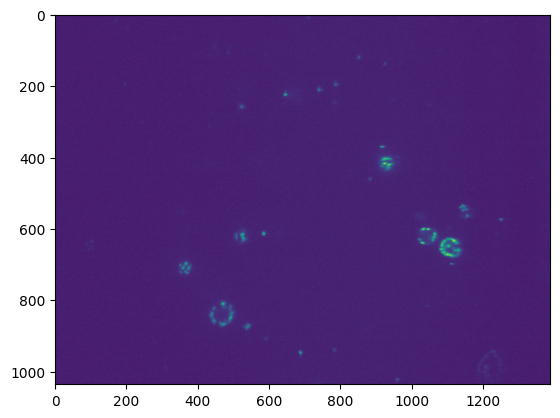

In [8]:
plt.imshow(images[140])

In [9]:
# Get the dimensions (n, height, width) where:
# n = number of images along the z-axis
# height = number of rows (Y dimension)
# width = number of columns (X dimension)
depth, height, width = volume.shape

# Create a PyVista UniformGrid (3D volume)
grid = pv.UniformGrid()
grid.dimensions = [width, height, depth]  # Make sure this is (X, Y, Z) order
grid.spacing = [1, 1, 1]  # You can adjust the spacing as needed

# Flatten the 3D volume and assign it to cell data (or point data)
grid.point_data["values"] = reduced_volume.flatten()  

# Add the scalar values to the grid

# Save the volume as a .vti file
grid.save("output_reduced_volume.vti")
print("Volume saved as .vti!")

/opt/anaconda3/envs/organoid/lib/python3.12/site-packages/pyvista/core/grid.py:912: PyVistaDeprecationWarning: `UniformGrid` is deprecated. Use `ImageData` instead.
  warnings.warn(


Volume saved as .vti!
